In [115]:
import pandas as pd
import sys

train_size = [50, 250, 750]
test_size = [12, 120, 360]

train = train_size[2]
test = test_size[2]

df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

# rename columns to fit neural prophet requirements
df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

# remove columns that are not needed
df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)


In [9]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
# set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet()
# Use static plotly in notebooks
m.set_plotting_backend("plotly-static")

# Fit the model on the dataset (this might take a bit)
metrics = m.fit(df_train)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [97.733]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 120
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (24) is too small than the required number                     for the learning rate finder

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [97.733]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/opt/anaconda3/lib/python3.9/site-packages/neuralprophet/data/split.py:273: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [98.468]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [98.468]% of the data.
INFO - (N

Predicting: 24it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/opt/anaconda3/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




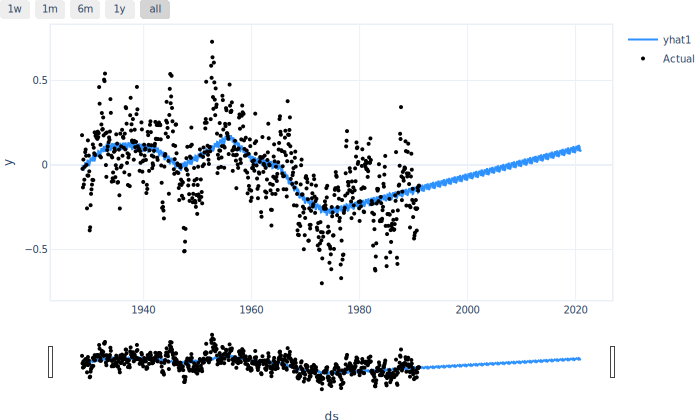

In [10]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df_train, n_historic_predictions=True, periods=360)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/opt/anaconda3/lib/python3.9/site-packages/neuralprophet/plot_model_parameters_plotly.py:237: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/opt/anaconda3/lib/python3.9/site-packages/neuralprophet/plot_model_parameters_plotly.py:271: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Users/nielsaalundkrogsgaard/opt/anaconda3/lib/python3.9/site-packages/neuralprophet/plot_model_parameters_plotly.py:475: FutureWarning:

The behavior 

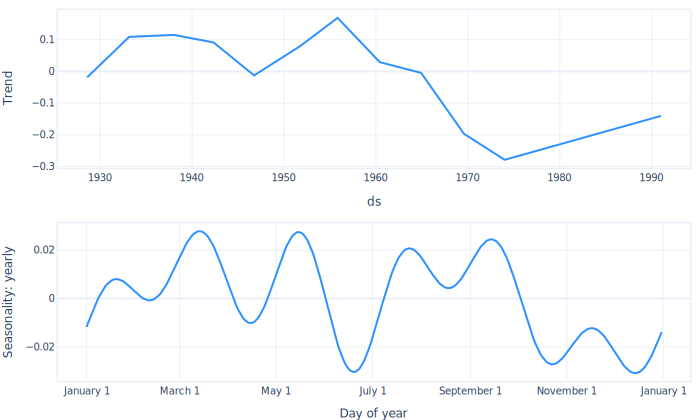

In [11]:
m.plot_parameters(components=["trend", "seasonality"])

In [4]:
import pandas as pd

train_size = [50, 250, 750]
test_size = [12, 120, 360]

train = train_size[2]
test = test_size[2]

df_train = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_train.csv')
df_test = pd.read_csv(f'../data/climate/data_partitions/Partition_test_{test}_train_{train}_test.csv')

# rename columns to fit neural prophet requirements
df_train.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)
df_test.rename(columns={'date': 'ds', 'AMOC0': 'y'}, inplace=True)

# remove columns that are not needed
df_train.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)
df_test.drop(columns=['time', 'AMOC1', 'AMOC2', 'GM'], inplace=True)


In [5]:
from statsmodels.tsa.stattools import adfuller

def apply_differencing(series, max_diff, alpha):
    # H0: Time-Series is Non-Stationary
    # H1: Time-Series is Stationary
    
    # if p_value <= alpha: # reject null hypothesis (stationary)
    # else: # fail to reject null hypothesis (non-stationary)        
    
    num_diff = 0
    result = adfuller(series.dropna(), autolag='AIC')
    p_value = result[1]

    while p_value > alpha and num_diff < max_diff: # while non-stationary, keep differencing the series to make it stationary
        series = series.diff().dropna()
        result = adfuller(series, autolag='AIC')
        p_value = result[1]
        num_diff += 1

    return num_diff, p_value

def make_series_stationary(df, max_diff=10, alpha=0.05):
    if 'ID' in df.columns:
        for id_value in df['ID'].unique():
            series = df[df['ID'] == id_value]['y']
            num_diff, p_value = apply_differencing(series, max_diff, alpha)
            print(f"ID {id_value}: Series is {'stationary' if p_value <= alpha else 'non-stationary'} \
                                                                after {num_diff} differencing operation(s).")
            if num_diff > 0:
                df.loc[df['ID'] == id_value, 'I'] = series.diff(periods=num_diff).fillna(0)
    else:
        series = df['y']
        num_diff, p_value = apply_differencing(series, max_diff, alpha)
        print(f"Series is {'stationary' if p_value <= alpha else 'non-stationary'} after {num_diff} differencing operation(s).")
        if num_diff > 0:
            df['I'] = series.diff(periods=num_diff).fillna(0)

    return df

# Example usage
df_train = make_series_stationary(df_train).fillna(0)

Series is stationary after 0 differencing operation(s).


In [6]:
import numpy as np
from statsmodels.tsa.stattools import acf

def find_optimal_lags(series, alpha):
    autocorr, confint = acf(series.dropna(), alpha=alpha, nlags=100, fft=True)
    conf_offset = confint[:, 1] - autocorr
    optimal_lags = np.where((autocorr < conf_offset) & (autocorr > -conf_offset))[0]

    if len(optimal_lags) == 0:
        return 0
    else:
        return optimal_lags[0] - 1

def calculate_optimal_lags(df, alpha=0.05):
    optimal_lags_dict = {}
    if 'ID' in df.columns:
        for id_value in df['ID'].unique():
            series = df[df['ID'] == id_value]['y']
            optimal_lags_dict[id_value] = find_optimal_lags(series, alpha)
    else:
        series = df['y']
        optimal_lags_dict['1'] = find_optimal_lags(series, alpha)

    return optimal_lags_dict

optimal_lags_dict = calculate_optimal_lags(df_train)   
optimal_lags = max(optimal_lags_dict.values())

print('Optimal n_lags: {}'.format(optimal_lags))

Optimal n_lags: 38


In [7]:
def calculate_moving_averages(df, freq=None):
    # Mapping common frequencies to moving average intervals
    intervals = {
        'D': [7, 14, 30, 60, 90, 180, 365],  # Daily data: week, fortnight, month, 2-months, quarter, half-year, year
        'W': [4, 8, 13, 26, 52],             # Weekly data: month, 2-months, quarter, half-year, year
        'M': [1, 3, 6, 12, 24],              # Monthly data: month, quarter, half-year, year, 2-years
        'H': [24, 72, 168, 336, 720],        # Hourly data: day, 3-days, week, 2-weeks, month
        'T': [15, 30, 60, 120, 240, 720, 1440] # Minutely data: quarter-hour, half-hour, hour, 2-hours, 4-hours, 12-hours, day
    }
                
    if freq:
        selected_intervals = intervals.get(freq)
        for interval in selected_intervals:
            column_name = f'MA_{interval}'
            if 'ID' in df.columns:
                # Calculate moving average per ID and backfill within each ID
                df[column_name] = df.groupby('ID')['y'].transform(lambda x: x.rolling(window=interval).mean()\
                                                                                      .fillna(method='bfill'))
            else:
                # Calculate moving average for entire series and backfill
                df[column_name] = df['y'].rolling(window=interval).mean().fillna(method='bfill')            
    else:
        print("Provided frequency is not recognized. Unable to calculate moving averages.")

    return df

# Add MA_7, MA_30 columns if frequency = 'D'
df_train = calculate_moving_averages(df_train, 'M')

/var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_33087/2792999585.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df['y'].rolling(window=interval).mean().fillna(method='bfill')
/var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_33087/2792999585.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df['y'].rolling(window=interval).mean().fillna(method='bfill')
/var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_33087/2792999585.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df['y'].rolling(window=interval).mean().fillna(method='bfill')
/var/folders/4z/w950d_5971x7nx7f55dk2hyh0000gn/T/ipykernel_33087/2792999585.py:21: FutureWarning: Serie

In [8]:
lagged_regressor_cols = df_train.columns[2:]

In [9]:
from hyperopt import hp, fmin, tpe, Trials,STATUS_OK 
from hyperopt.pyll.base import scope
from hyperopt.early_stop import no_progress_loss
import torch

epochs=[100]
daily_seasonality=['auto']
weekly_seasonality=['auto']
yearly_seasonality=['auto']
#loss_func=['MAE','MSE','Huber']
seasonality_mode=['additive','multiplicative']
#n_changepoints=[30,60]
# learning_rate=[0.01,0.001,1]

model_params =\
{
'epochs':hp.choice('epochs',epochs), 
'daily_seasonality':hp.choice('daily_seasonality',daily_seasonality),
'weekly_seasonality':hp.choice('weekly_seasonality',weekly_seasonality),
'yearly_seasonality':hp.choice('yearly_seasonality',yearly_seasonality),
#'loss_func':hp.choice('loss_func',loss_func),
'seasonality_mode': hp.choice('seasonality_mode',seasonality_mode),     # additive = T+S+e, (Trend, Seasonality, error)
                                                                        # multiplicative = T*S*e 
#'n_changepoints':hp.choice('n_changepoints',n_changepoints),            # Number of potential trend changepoints to include
#'learning_rate':hp.choice('learning_rate',learning_rate),               
}

ip_params=\
{
'df':df_train,                                        # dataframe
'freq':None,                                    # model calculates frequency automatically
'n_historic_predictions':True,                  # number of historic points included for past projection
'periods':100,                                   # number of points for future projection
'valid_p':0.2,                                  # train_test_split
'max_evals': 10,                                # maximum evaluations for hyperparameter tuning
'lagged_regressor_cols': lagged_regressor_cols, # columns used as lagged regressors
}

op_params=\
{
'n_lags': optimal_lags ,                        # previous time series steps to include in AR (or) AR-Order
'n_forecasts': 100,                              # Number of steps ahead of prediction time step to forecast.   
#'ar_layers':[32, 32, 32, 32],                   # architecture layers for autoregression
}

In [10]:
def train_neural_prophet(df, model_params, ip_params, op_params):    
    # Combine model parameters & additional input & output parameters
    args = {'model_params':model_params,'ip_params':ip_params,'op_params':op_params} 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # GPU Check        
    print('Device Used: {}'.format(device))
    trainer_config = {"accelerator":"cuda"} # use GPU if available, no need for model.to(device) for neuralprophet           
    
    def optimize(args): # Hyperparameter tuning with Hyperopt
        df = args['ip_params']['df']
        if 'ID' in df.columns: # add local trend & seasonality for each ID if present
            global_local = 'local'
        else: # else model the whole series as a whole
            global_local = 'global'            
        model = NeuralProphet( **{**args['model_params'],**args['op_params']},trend_global_local=global_local,\
                                                                              season_global_local=global_local)        
        if args['ip_params']['lagged_regressor_cols'] is not None:
            if args['op_params']['n_lags']>0:
                for col in args['ip_params']['lagged_regressor_cols']:
                    model = model.add_lagged_regressor(col, normalize="standardize")
            else:
                df = df[list(set(df.columns) - set(ip_params['lagged_regressor_cols']))]
        df_train, df_test = model.split_df(df, freq=args['ip_params']['freq'], valid_p=args['ip_params']['valid_p'])
        train_metrics = model.fit(df_train, freq=args['ip_params']['freq'])
        test_metrics = model.test(df_test)    
        return {'loss':test_metrics['RMSE_val'].reset_index(drop=True)[0], 'status': STATUS_OK }

    early_stop_fn = no_progress_loss(iteration_stop_count=int((args['ip_params']['max_evals'])*0.7), percent_increase=0.5)
    trials = Trials()
    best_results = fmin(optimize, space=args, algo=tpe.suggest, trials=trials, max_evals=args['ip_params']['max_evals'],\
                       early_stop_fn = early_stop_fn)
    best_model_params =\
    {
    'epochs':epochs[best_results['epochs']], 
    'daily_seasonality':daily_seasonality[best_results['daily_seasonality']],
    'weekly_seasonality':weekly_seasonality[best_results['weekly_seasonality']],
    'yearly_seasonality':yearly_seasonality[best_results['yearly_seasonality']],
    'loss_func':loss_func[best_results['loss_func']],
    'seasonality_mode':seasonality_mode[best_results['seasonality_mode']], 
    'n_changepoints':n_changepoints[best_results['n_changepoints']],
    'learning_rate':learning_rate[best_results['learning_rate']], 
    }
    
    df = args['ip_params']['df']    
    if 'ID' in df.columns: # add local trend & seasonality for each ID if present
        global_local = 'local'
    else: # else model the whole series as a whole
        global_local = 'global'                
    model = NeuralProphet( **{**best_model_params,**args['op_params']},trend_global_local=global_local,\
                                                                              season_global_local=global_local) 
        
    if args['ip_params']['lagged_regressor_cols'] is not None:    
        if args['op_params']['n_lags']>0:
            for col in args['ip_params']['lagged_regressor_cols']:
                model = model.add_lagged_regressor(col, normalize="standardize")
        else:
            df = df[list(set(df.columns) - set(ip_params['lagged_regressor_cols']))]        
    df_train, df_test = model.split_df(df, freq=args['ip_params']['freq'], valid_p=args['ip_params']['valid_p'])
    train_metrics = model.fit(df_train, freq=args['ip_params']['freq'])
    test_metrics = model.test(df_test)    
    future = model.make_future_dataframe(df, periods=args['ip_params']['periods'],\
                                             n_historic_predictions=args['ip_params']['n_historic_predictions'])
    forecast = model.predict(future)
    final_train_metrics = train_metrics.iloc[-1:].reset_index(drop=True)
    final_test_metrics = test_metrics.iloc[-1:].reset_index(drop=True)
    return model, forecast, best_model_params, final_train_metrics, final_test_metrics

In [11]:
model, forecast, best_model_params, train_metrics, test_metrics =\
        train_neural_prophet(df_train, model_params, ip_params, op_params)

Device Used: cpu
  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

job exception: name 'NeuralProphet' is not defined



  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]


NameError: name 'NeuralProphet' is not defined

In [136]:
# Define a function to select the first non-zero, non-NaN yhat value
def select_yhat(row, yhat_columns):
    for col in yhat_columns:
        if pd.notna(row[col]) and row[col] != 0:
            return row[col]
    return np.nan

yhat_columns = [col for col in forecast.columns if col.startswith('yhat')]
forecast['yhat_final'] = forecast.apply(select_yhat, axis=1, yhat_columns=yhat_columns)

In [139]:
import plotly.graph_objects as go
from plotly_resampler import FigureResampler

def plot_time_series_for_each_id(df, forecast, test_metrics):
    """Plots time series data for each ID or a single plot if no ID column."""

    if 'ID' in df.columns:
        unique_ids = df['ID'].unique()
        for id_value in unique_ids:
            plot_time_series(forecast[forecast['ID'] == id_value].reset_index(drop=True), id_value, test_metrics)
    else:
        plot_time_series(forecast, None, test_metrics)

def plot_time_series(forecast_data, id_value=None, test_metrics=None):
    """Plots time series data for a single ID or full dataset."""

    future_start_index = forecast_data['y'].last_valid_index() + 1

    fig = go.Figure()
    fig.add_trace(go.Scattergl(x=forecast_data['ds'], y=forecast_data['y'], mode='lines', name='Actual'))
    fig.add_trace(go.Scattergl(x=forecast_data['ds'][:future_start_index+1], y=forecast_data['yhat_final'][:future_start_index+1],
                                mode='lines', name='Predicted (Past)', line=dict(color='blue')))
    fig.add_trace(go.Scattergl(x=forecast_data['ds'][future_start_index:], y=forecast_data['yhat_final'][future_start_index:],
                                mode='lines', name='Predicted (Future)', line=dict(color='#FF00FF')))

    mae = test_metrics['MAE_val'][0]
    rmse = test_metrics['RMSE_val'][0]
    fig.add_annotation(text=f'Test MAE: {mae:.2f}<br>Test RMSE: {rmse:.2f}',
                        xref='paper', yref='paper',
                        x=1, y=0, showarrow=False, font=dict(size=12),
                        align="left", bordercolor="black", borderwidth=2,
                        bgcolor="white", opacity=0.8)

    title = f'Time Series Plot for ID: {id_value}' if id_value else 'Time Series Plot'
    fig.update_layout(title=title, xaxis_title='ds', yaxis_title='Values')
    # Use Plotly Resampler to optimize rendering
    fig = FigureResampler(fig).show()

# Call the function with your DataFrame, forecast DataFrame, and test metrics
plot_time_series_for_each_id(df_train, forecast, test_metrics)   

In [140]:
df_train['ds'] = pd.to_datetime(df_train['ds']).dt.tz_localize(None)
df_test['ds'] = pd.to_datetime(df_test['ds']).dt.tz_localize(None)
forecast['ds'] = pd.to_datetime(forecast['ds']).dt.tz_localize(None)

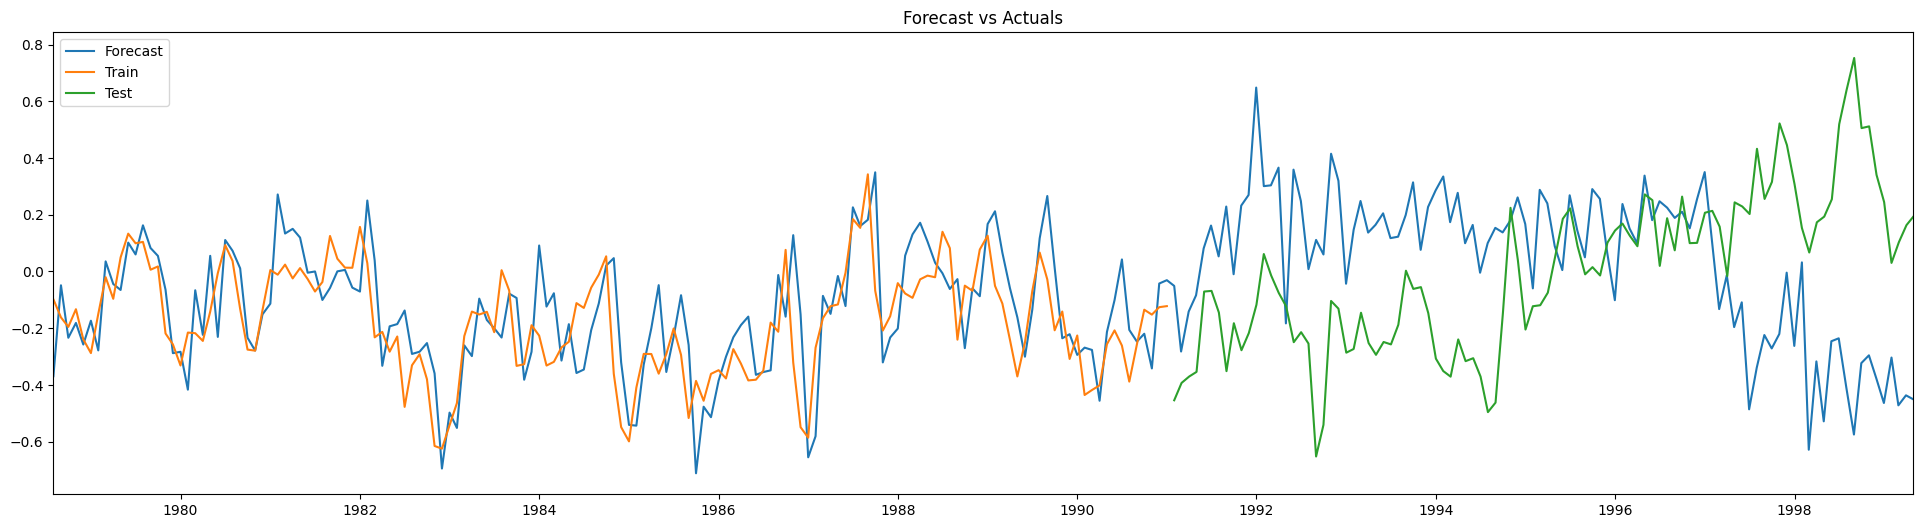

In [145]:
# plot the forecast with df_train and df_test with matplotlig
import matplotlib.pyplot as plt

# Plot the forecast with the actual values
plt.figure(figsize=(24, 6))
plt.plot(forecast['ds'], forecast['yhat_final'], label='Forecast')
plt.plot(df_train['ds'], df_train['y'], label='Train')
plt.plot(df_test['ds'][:100], df_test['y'][:100], label='Test')
# plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='k', alpha=0.1)
plt.title('Forecast vs Actuals')
plt.legend()
plt.xlim([df_train['ds'][600], forecast['ds'].max()])
plt.show()

# plot_forecast(df_train, df_test, forecast, test_metrics)

In [133]:
best_model_params

{'epochs': 200,
 'daily_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'yearly_seasonality': 'auto',
 'loss_func': 'MAE',
 'seasonality_mode': 'multiplicative',
 'n_changepoints': 60,
 'learning_rate': 0.001}